In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import plotly.express as px
from IPython.display import display, HTML

In [2]:
df = pd.read_excel("zepto_v1.xlsx")

In [3]:
df

Category                                               name  \
0     Fruits & Vegetables                                              Onion   
1     Fruits & Vegetables                                      Tomato Hybrid   
2     Fruits & Vegetables                                     Tender Coconut   
3     Fruits & Vegetables                                   Coriander Leaves   
4     Fruits & Vegetables                                     Ladies Finger    
...                   ...                                                ...   
3727     Health & Hygiene  Stayfree Secure Dry Cover Extra Large Sanitary...   
3728     Health & Hygiene  Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup   
3729     Health & Hygiene       Whisper Bindazzz Night Sanitary Pads XL Plus   
3730     Health & Hygiene                             Fine Life Cotton Balls   
3731     Health & Hygiene                           Dettol Antiseptic Liquid   

        mrp  discountPercent  availableQuantity  discountedSellingPrice  \
0      2500               16                  3                    2100   
1      4200               16                  3                    3500   
2      5100               15                  3                    4300   
3      2000               15                  3                    1700   
4      1400               14                  3                    1200   
...     ...              ...                ...                     ...   
3727   4200                2                  0                    4100   
3728  10500               15                  0                    8900   
3729  18500                0                  0                   18500   
3730   6000                0                  0                    6000   
3731   3000                0                  0                    3000   

      weightInGms  outOfStock  quantity  
0            1000       False         1  
1            1000       False         1  
2              58       False         1  
3             100       False       100  
4             250       False       250  
...           ...         ...       ...  
3727          406        True         7  
3728          100        True       100  
3729          870        True        15  
3730           50        True        50  
3731           60        True        60  

[3732 rows x 9 columns]

In [4]:
df.isnull().sum()

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

In [14]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [15]:
numeric_columns = ['mrp', 'discountedsellingprice', 'discountpercent', 'availablequantity', 'quantity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

### 1. Average Discount per Category

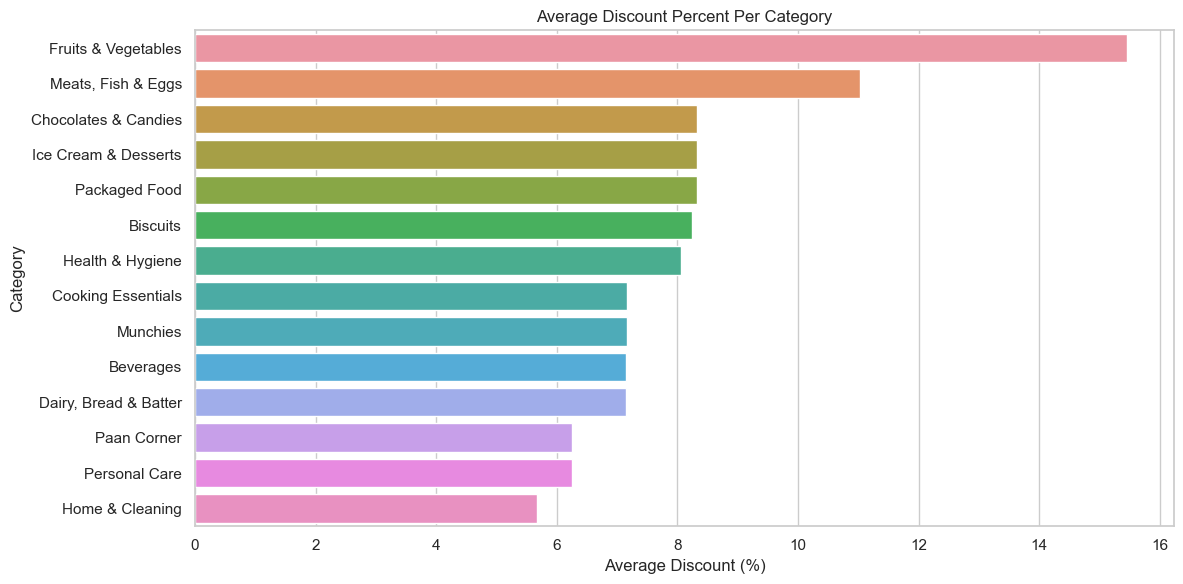

In [16]:
plt.figure(figsize=(12, 6))
avg_discount = df.groupby('category')['discountpercent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_discount.values, y=avg_discount.index)
plt.title("Average Discount Percent Per Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### 2. Product Count per Category

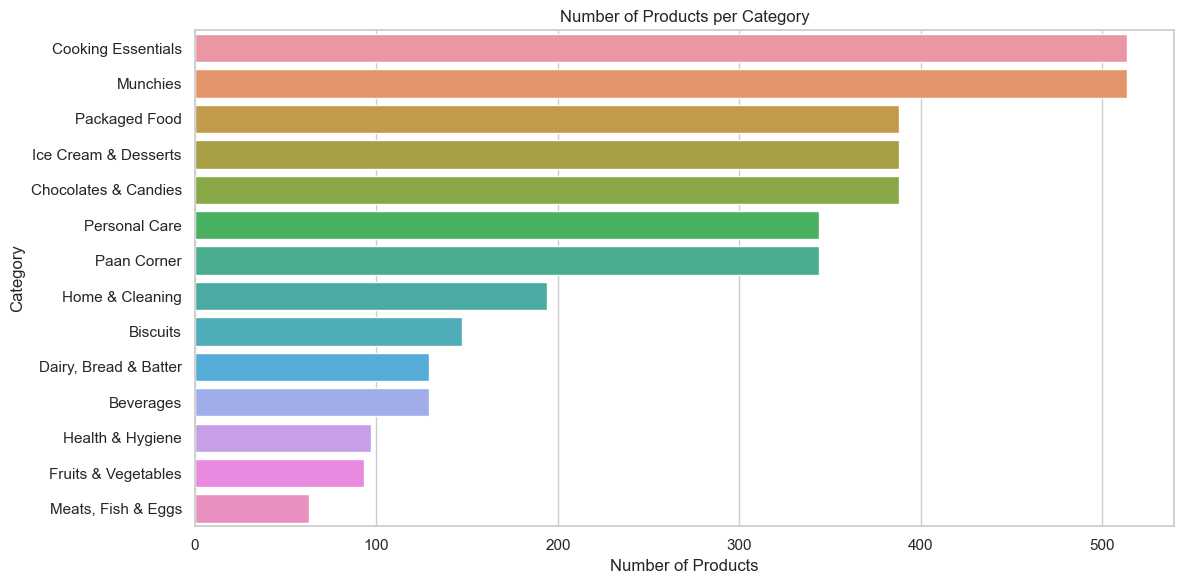

In [17]:
plt.figure(figsize=(12, 6))
product_count = df['category'].value_counts()
sns.barplot(x=product_count.values, y=product_count.index)
plt.title("Number of Products per Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### 3. Sunburst Plot

In [18]:
df['discount_bucket'] = pd.cut(df['discountpercent'], bins=[0, 10, 20, 30, 50, 100],
                                labels=['0-10%', '11-20%', '21-30%', '31-50%', '51%+'])

# Convert outofstock to readable label
df['stock_status'] = df['outofstock'].map({False: 'In Stock', True: 'Out of Stock'})

# Drop rows with missing path components
sunburst_df = df.dropna(subset=['category', 'discount_bucket', 'stock_status'])

# Create Sunburst Plot
fig = px.sunburst(sunburst_df,
                  path=['category', 'discount_bucket', 'stock_status'],
                  values='availablequantity',
                  color='discount_bucket',
                  title="Sunburst: Category → Discount → Stock Status",
                  height=600)
fig.show()

### 4. Top Categories by Total Stack

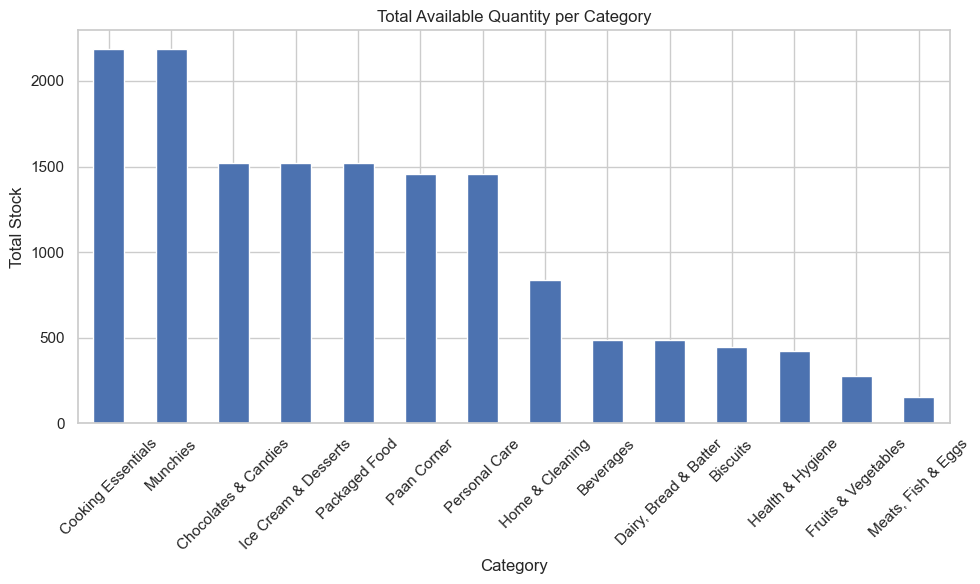

In [19]:
df.groupby('category')['availablequantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Total Available Quantity per Category")
plt.xlabel("Category")
plt.ylabel("Total Stock")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Top 10 Discounted Products

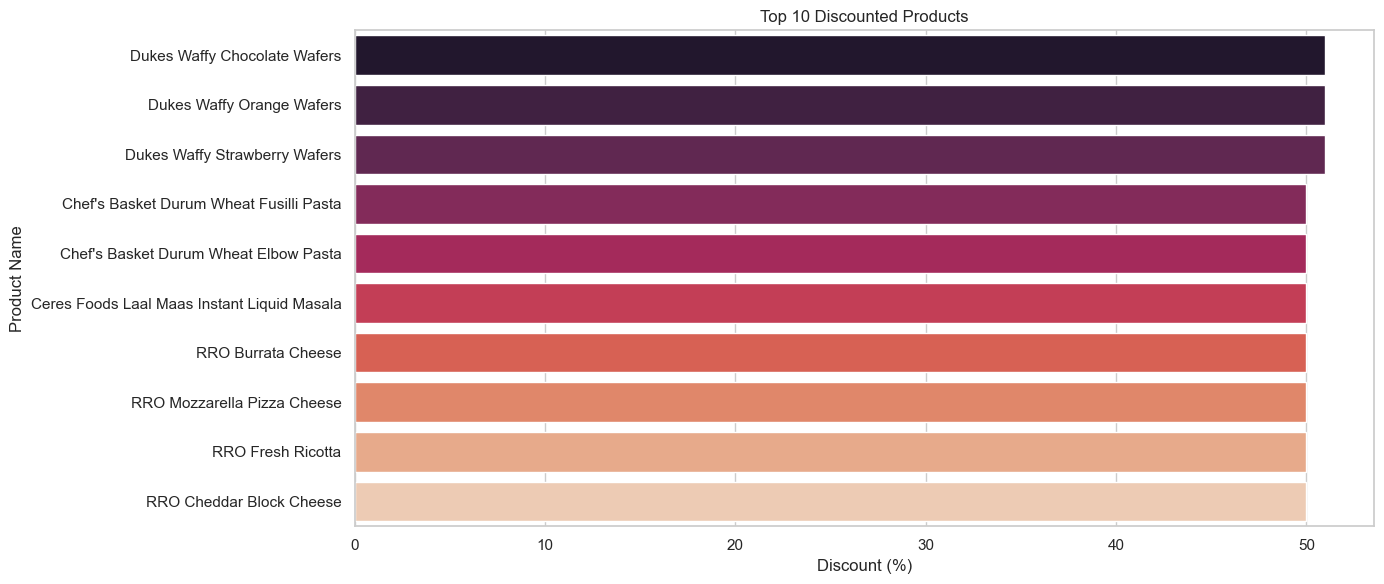

In [21]:
top_discounts = df.sort_values(by='discountpercent', ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x='discountpercent', y='name', data=top_discounts, palette="rocket")
plt.title("Top 10 Discounted Products")
plt.xlabel("Discount (%)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

### 6. Price Distribution per Category

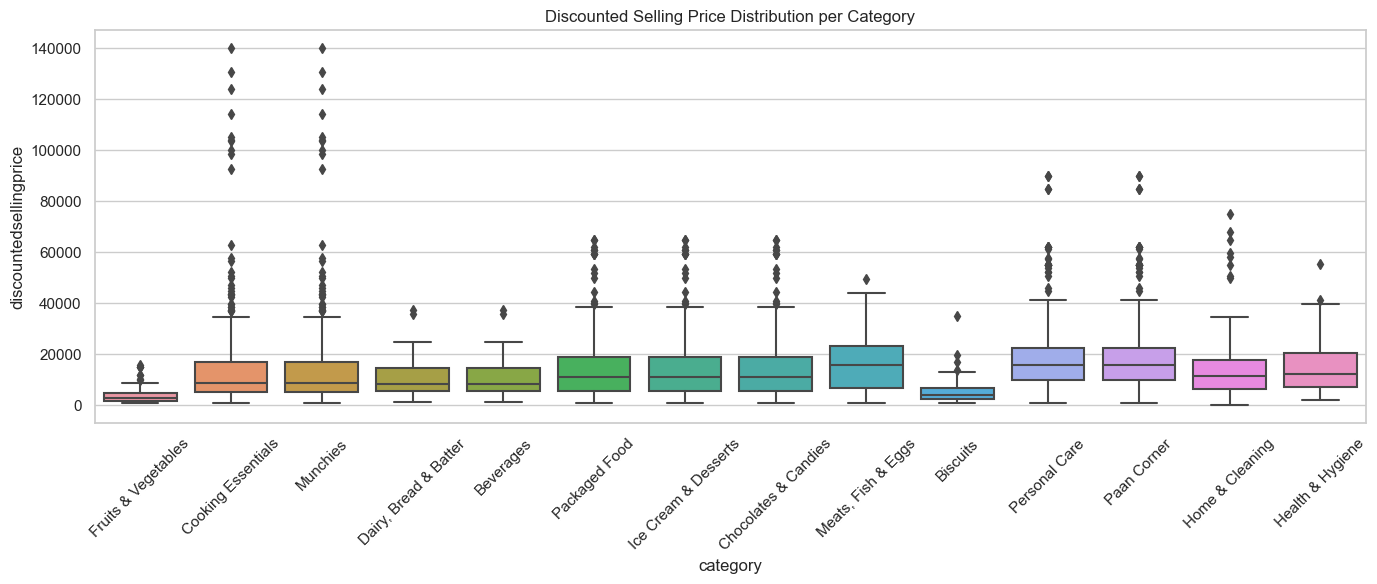

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='discountedsellingprice')
plt.title("Discounted Selling Price Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. MRP vs. Discounted Price

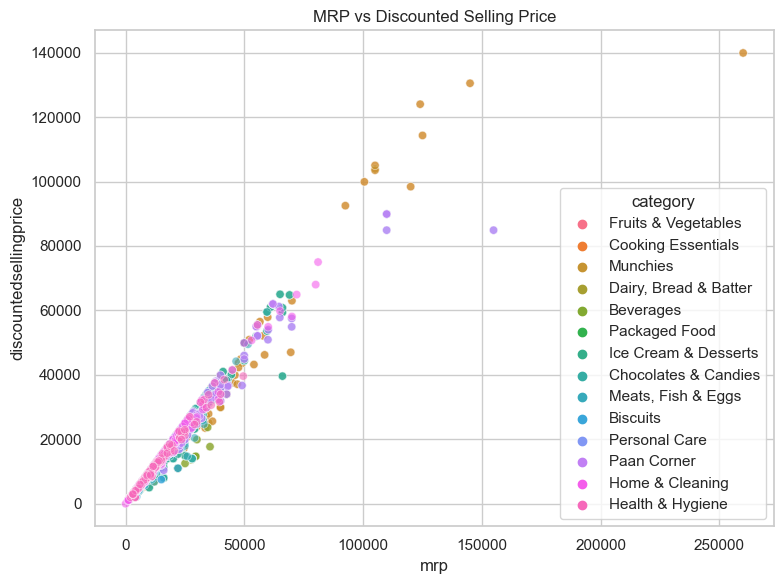

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mrp', y='discountedsellingprice', hue='category', alpha=0.6)
plt.title("MRP vs Discounted Selling Price")
plt.tight_layout()
plt.show()

### 8. Discount Percent vs. Stock Quality

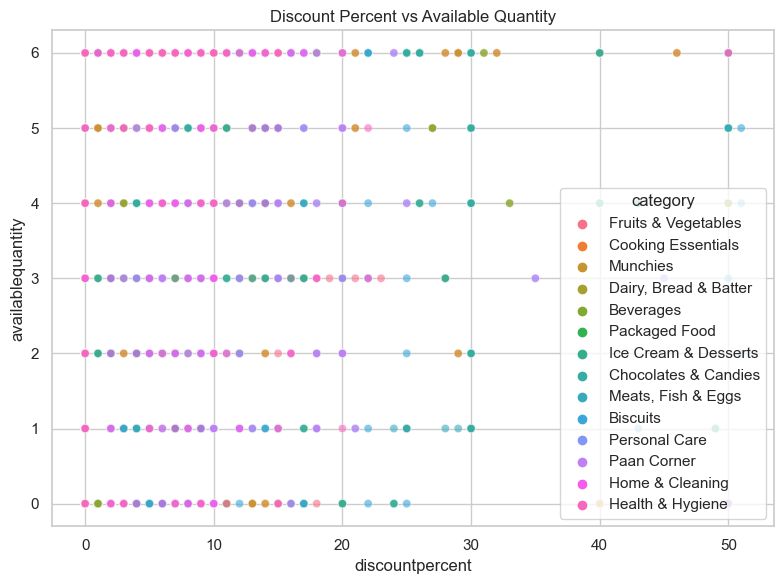

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discountpercent', y='availablequantity', hue='category', alpha=0.6)
plt.title("Discount Percent vs Available Quantity")
plt.tight_layout()
plt.show()

### 9. Price Difference Analysis

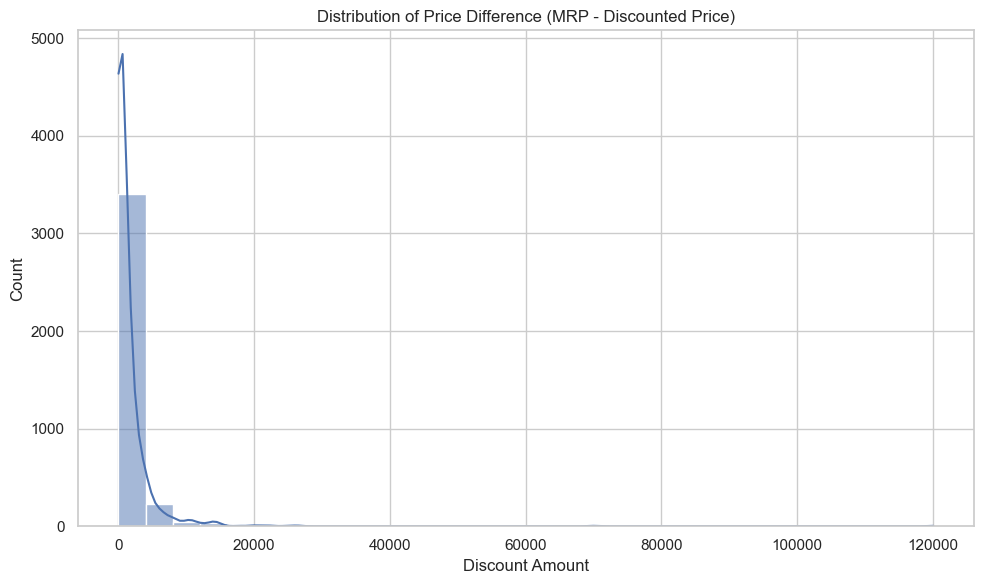

In [25]:
df['price_diff'] = df['mrp'] - df['discountedsellingprice']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff'], bins=30, kde=True)
plt.title("Distribution of Price Difference (MRP - Discounted Price)")
plt.xlabel("Discount Amount")
plt.tight_layout()
plt.show()

### 10. Product Distributiion by Category

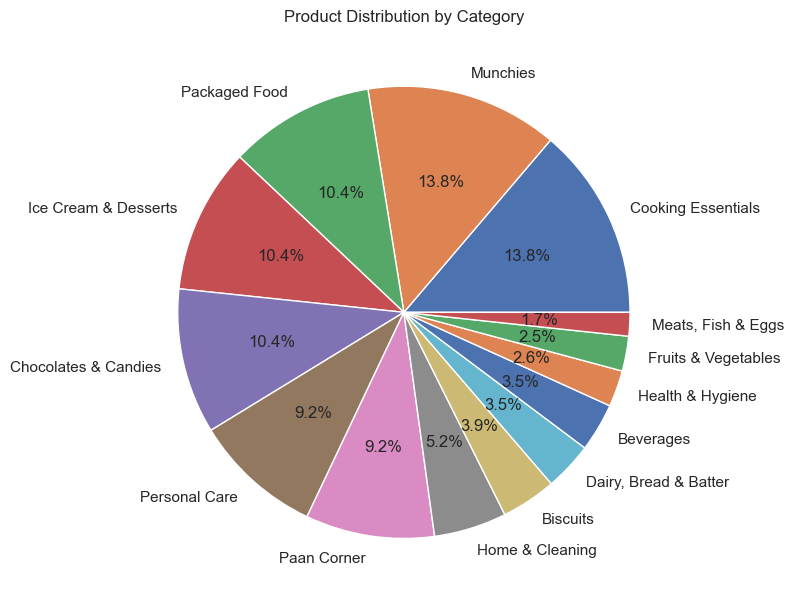

In [26]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Product Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 11. Stock Availability 

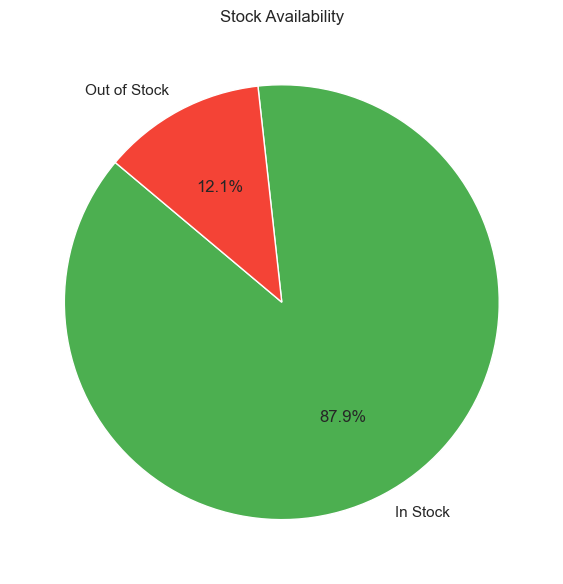

In [27]:
stock_counts = df['outofstock'].value_counts()
labels = ['In Stock', 'Out of Stock']
colors = ['#4caf50', '#f44336']  # Green and Red

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(stock_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Stock Availability")
plt.tight_layout()
plt.show()

### 12. Discount Percent Distribution

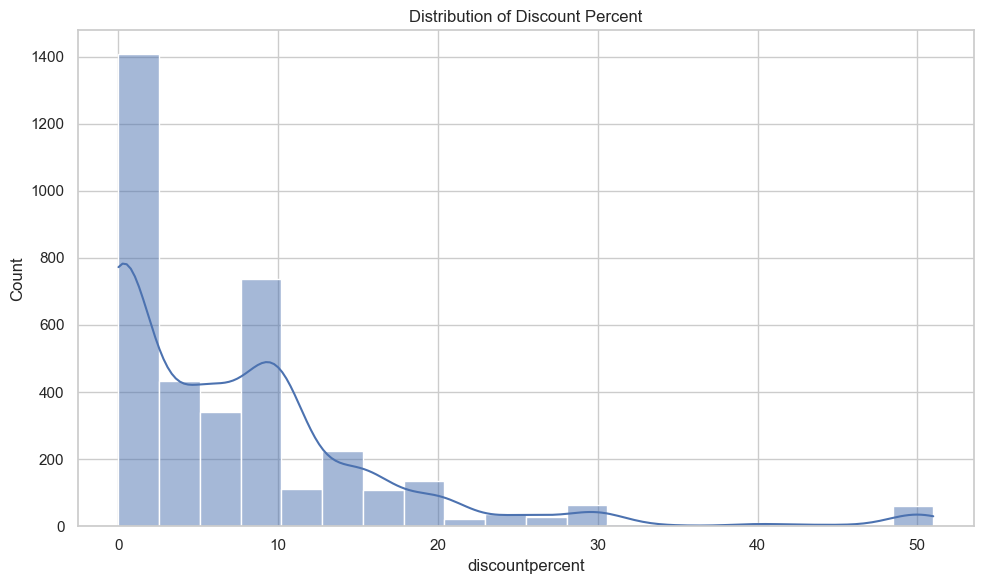

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discountpercent'], bins=20, kde=True)
plt.title("Distribution of Discount Percent")
plt.tight_layout()
plt.show()

### 13. MRP Value Distribution

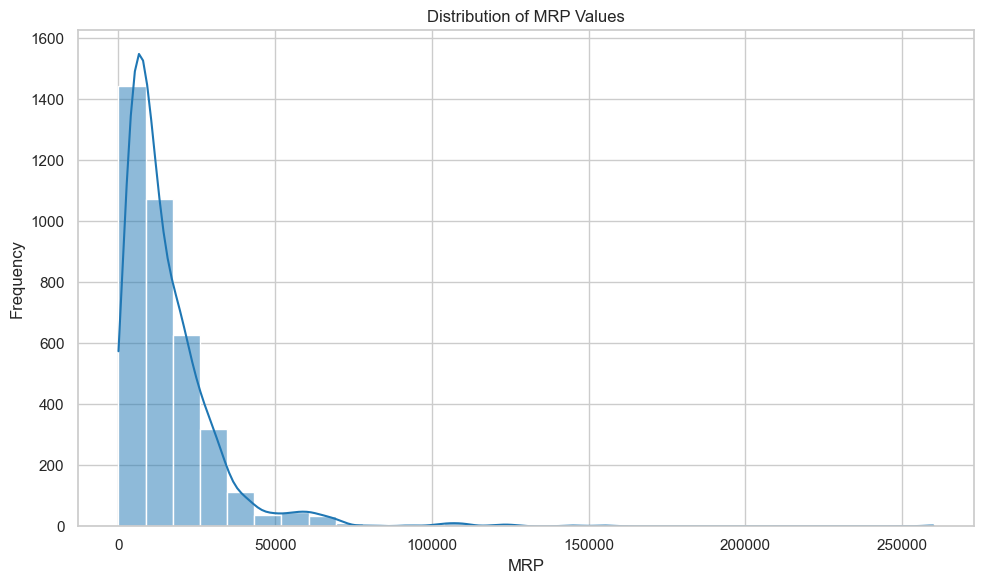

In [29]:
# Ensure 'mrp' column is numeric
df['mrp'] = pd.to_numeric(df['mrp'], errors='coerce')

# Drop rows with missing or invalid MRP values
valid_mrp = df['mrp'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(valid_mrp, bins=30, kde=True, color='#1f77b4')
plt.title("Distribution of MRP Values")
plt.xlabel("MRP")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### 14. Correlation Heatmap

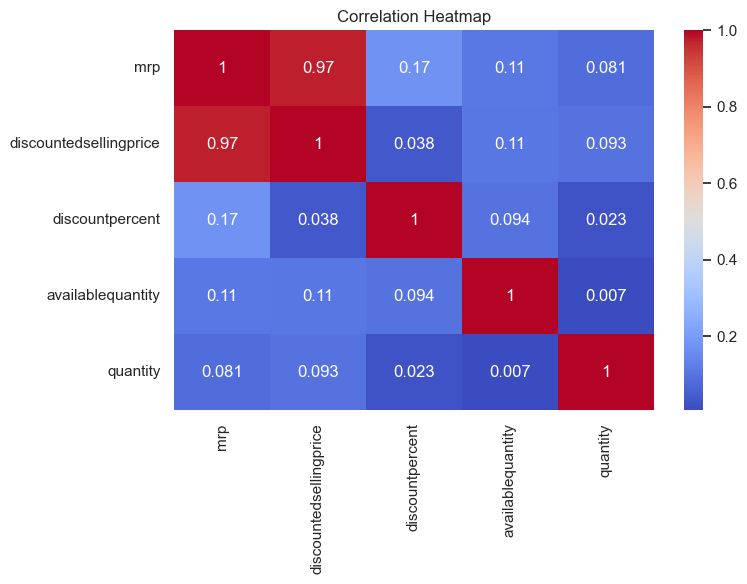

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 15. Violin Plot of Discounts by Category

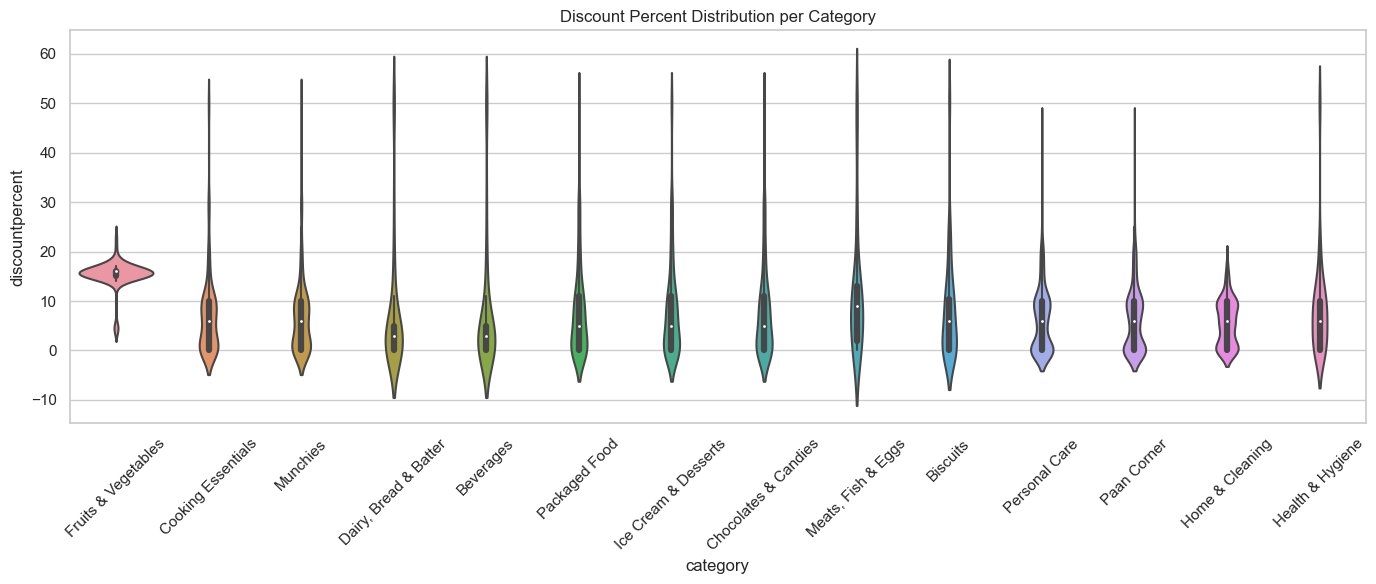

In [31]:
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Violin Plot: Discount % per category
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='category', y='discountpercent')
plt.title("Discount Percent Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/violin_discount_by_category.png")
plt.show()

### 16. Bubble Chart - Discount vs Price vs Stock

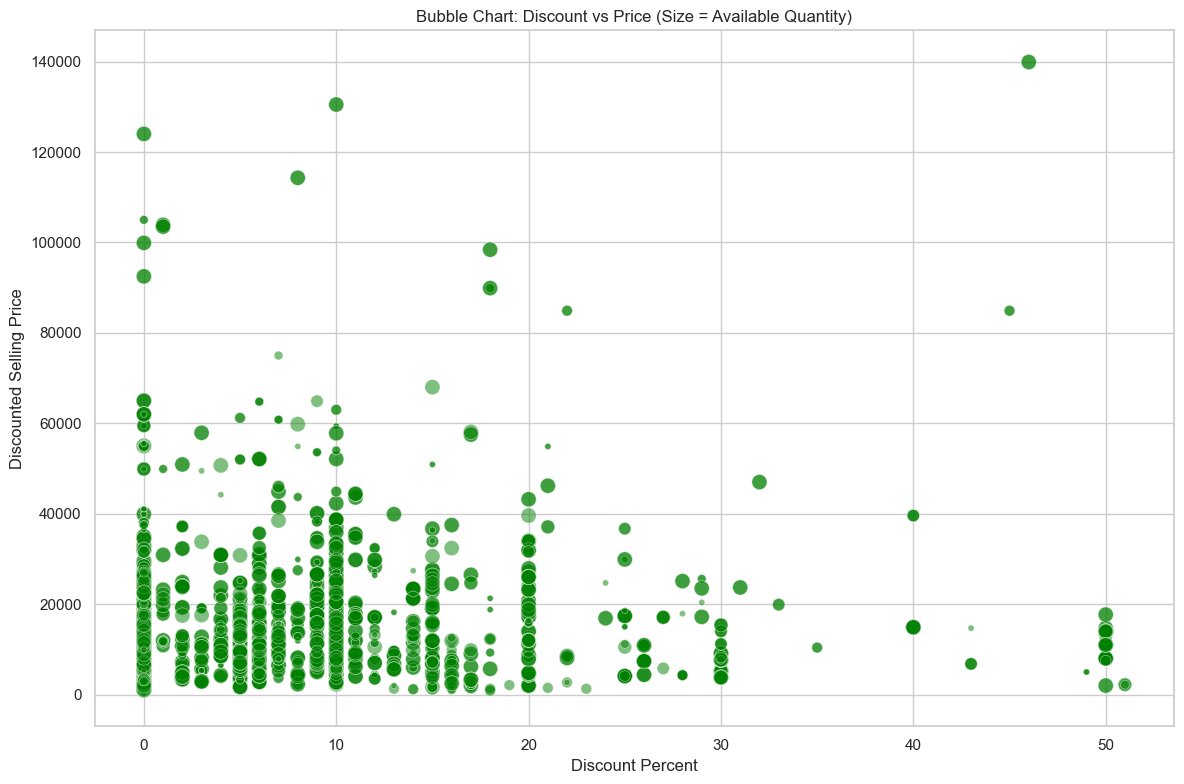

In [33]:
plt.figure(figsize=(12, 8))
bubble = df.copy()
plt.scatter(bubble['discountpercent'], bubble['discountedsellingprice'],
            s=bubble['availablequantity']*20, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.xlabel("Discount Percent")
plt.ylabel("Discounted Selling Price")
plt.title("Bubble Chart: Discount vs Price (Size = Available Quantity)")
plt.tight_layout()
plt.savefig(f"{output_dir}/bubble_discount_vs_price.png")
plt.show()

### 17. Quantity Pack Analysis

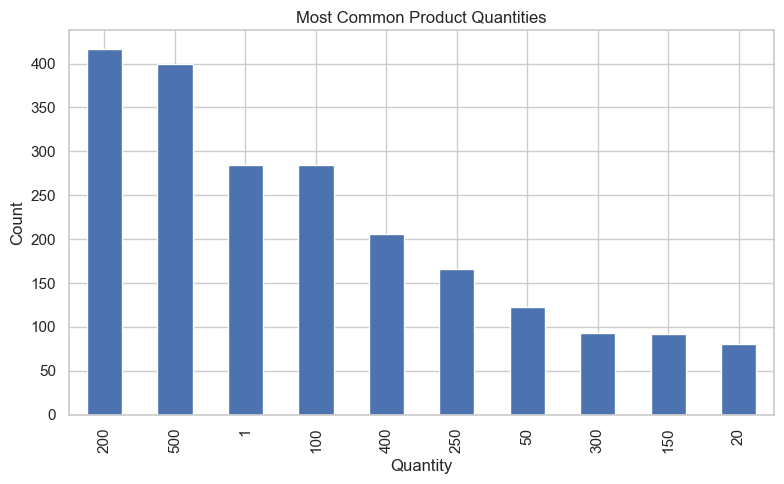

In [34]:
df['quantity'].value_counts().head(10).plot(kind='bar', figsize=(8,5))
plt.title("Most Common Product Quantities")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 18. Sorted Discount Trend (Line Plot)

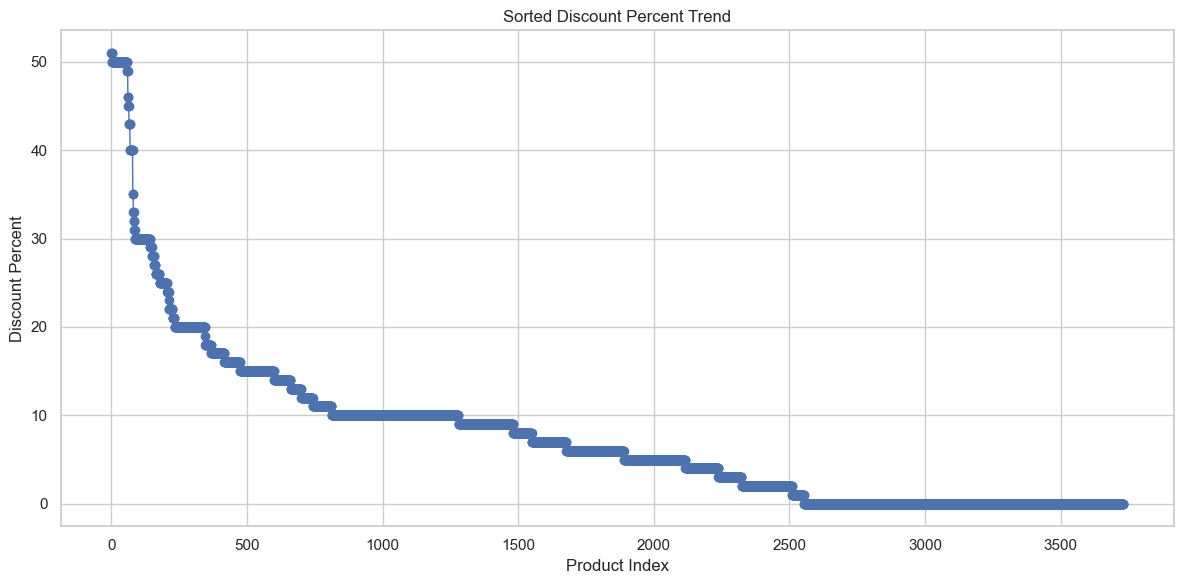

In [35]:
sorted_discounts = df.sort_values(by='discountpercent', ascending=False)['discountpercent'].reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(sorted_discounts, marker='o', linewidth=1)
plt.title("Sorted Discount Percent Trend")
plt.xlabel("Product Index")
plt.ylabel("Discount Percent")
plt.tight_layout()
plt.savefig(f"{output_dir}/line_discount_trend.png")
plt.show()

### 19. Word Cloud - Most Frequent Product Names

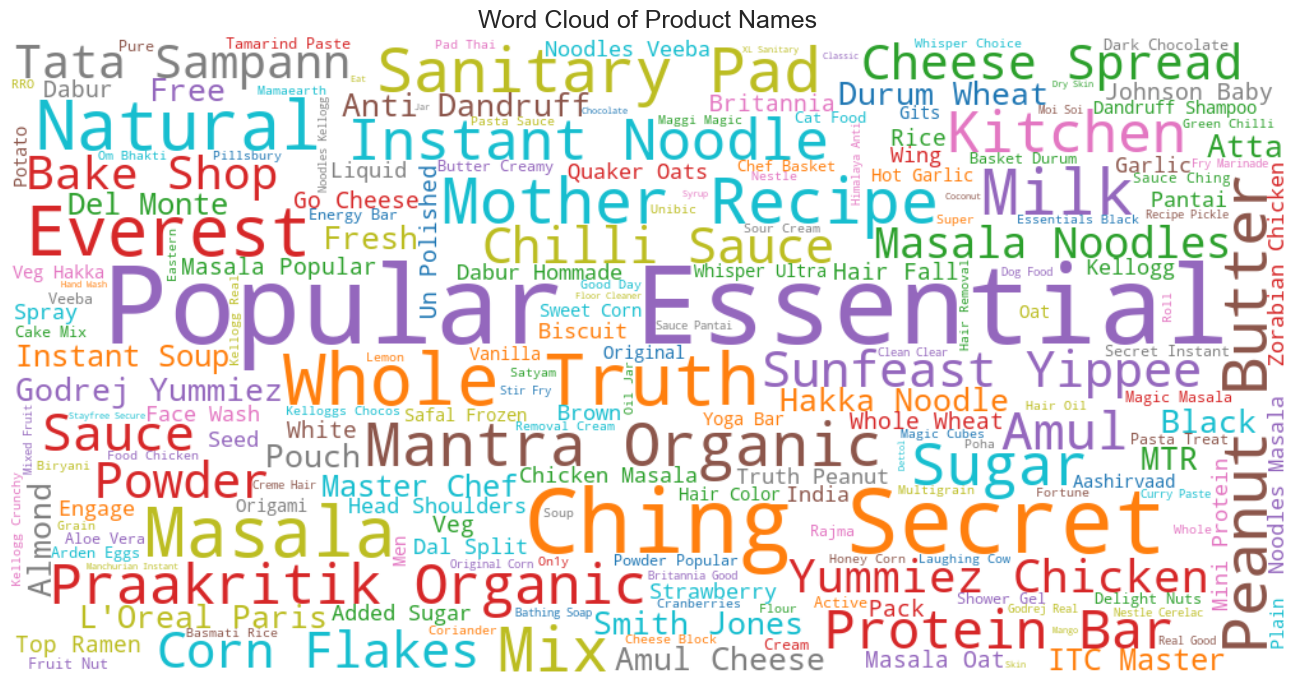

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all names into one string
text = ' '.join(df['name'].dropna().astype(str))

# Generate and plot word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='tab10').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Names", fontsize=18)
plt.tight_layout()
plt.show()